In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix,roc_curve
import scikitplot as skplt

pd.set_option('max_rows',500)

In [2]:
df = pd.read_csv("data_hd.csv")

In [3]:
df

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
0,63,1,1,145,233,1,2,150,0,0
1,67,1,4,160,286,0,2,108,3,1
2,67,1,4,120,229,0,2,129,2,1
3,37,1,3,130,250,0,0,187,0,0
4,41,0,2,130,204,0,2,172,0,0
5,56,1,2,120,236,0,0,178,0,0
6,62,0,4,140,268,0,2,160,2,1
7,57,0,4,120,354,0,0,163,0,0
8,63,1,4,130,254,0,2,147,1,1
9,53,1,4,140,203,1,2,155,0,1


### Problem 1 - Exploratory Data Analysis 

In [4]:
df['MajorVessels'].value_counts()

0    174
1     65
2     38
3     20
Name: MajorVessels, dtype: int64

In [5]:
df['Age'].mean()

54.54208754208754

In [6]:
hdsubset = df[df['HD'] == 1]

In [7]:
hdsubset

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
1,67,1,4,160,286,0,2,108,3,1
2,67,1,4,120,229,0,2,129,2,1
6,62,0,4,140,268,0,2,160,2,1
8,63,1,4,130,254,0,2,147,1,1
9,53,1,4,140,203,1,2,155,0,1
12,56,1,3,130,256,1,2,142,1,1
16,48,1,2,110,229,0,0,168,0,1
22,58,1,2,120,284,0,2,160,0,1
23,58,1,3,132,224,0,2,173,2,1
24,60,1,4,130,206,0,2,132,2,1


In [8]:
hdsubset['Chol'].mean()

251.85401459854015

### Problem 2.1 - Preparing the Data 

In [9]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
0,63,1,1,145,233,1,2,150,0,0
1,67,1,4,160,286,0,2,108,3,1
2,67,1,4,120,229,0,2,129,2,1
3,37,1,3,130,250,0,0,187,0,0
4,41,0,2,130,204,0,2,172,0,0


In [10]:
X = df.iloc[:,0:9]
y = df.iloc[:,9]

In [11]:
X.shape, y.shape

((297, 9), (297,))

In [12]:
X.values, y.values

(array([[ 63,   1,   1, ...,   2, 150,   0],
        [ 67,   1,   4, ...,   2, 108,   3],
        [ 67,   1,   4, ...,   2, 129,   2],
        ...,
        [ 68,   1,   4, ...,   0, 141,   2],
        [ 57,   1,   4, ...,   0, 115,   1],
        [ 57,   0,   2, ...,   2, 174,   1]], dtype=int64),
 array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=100)

In [14]:
X_train.shape

(207, 9)

### Problem 2.2 - Simple Logistic Regression

In [15]:
logicdf = df[['Thalach','HD']]

In [16]:
logicdf.head()

,Thalach,HD
0,150,0
1,108,1
2,129,1
3,187,0
4,172,0


In [17]:
logicdf.shape

(297, 2)

In [18]:
X1 = df['Thalach'].values
Y1 = df['HD'].values

In [19]:
X1, Y1

(array([150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 142,
        173, 162, 174, 168, 160, 139, 171, 144, 162, 160, 173, 132, 158,
        172, 114, 171, 114, 151, 160, 158, 161, 179, 178, 120, 112, 132,
        137, 114, 178, 162, 157, 169, 165, 123, 128, 157, 152, 168, 140,
        153, 188, 144, 109, 163, 158, 152, 125, 142, 160, 131, 170, 113,
        142, 155, 165, 140, 147, 148, 163,  99, 158, 177, 151, 141, 142,
        180, 111, 148, 143, 182, 150, 172, 180, 156, 160, 149, 151, 145,
        146, 175, 172, 161, 142, 157, 158, 186, 185, 174, 159, 130, 139,
        156, 162, 150, 140, 140, 146, 144, 190, 136,  97, 132, 165, 182,
        132, 127, 150, 154, 143, 111, 174, 175, 133, 126, 170, 163, 147,
        154, 202, 186, 165, 161, 125, 103, 130, 166, 164, 159, 184, 131,
        154, 152, 124, 179, 170, 160, 178, 122, 160, 145,  96, 109, 173,
        171, 170, 151, 156, 162, 158, 122, 175, 168, 159, 156, 138, 112,
        111, 143, 157, 132,  88, 147, 105, 162, 173

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size=0.3, random_state=100)

In [21]:
X_train.shape, X_test.shape

((207,), (90,))

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train.reshape(-1,1),y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr.coef_

array([[-0.04660737]])

In [25]:
y_predict = lr.predict(X_test.reshape(-1, 1))

In [26]:
y_predict

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [27]:
y_predict.shape

(90,)

In [28]:
accuracy_score(y_test,y_predict)

0.7444444444444445

In [29]:
cm = confusion_matrix(y_test,y_predict)

In [30]:
cm

array([[37, 15],
       [ 8, 30]], dtype=int64)

In [31]:
lr.score(X_test.reshape(-1,1),y_test)

0.7444444444444445

In [32]:
30/38  #true positive rate

0.7894736842105263

In [33]:
15/(37+15) #false positive rate 

0.28846153846153844

### Problem 3.1 - Adding More Variables

In [34]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,FBS,RestECG,Thalach,MajorVessels,HD
0,63,1,1,145,233,1,2,150,0,0
1,67,1,4,160,286,0,2,108,3,1
2,67,1,4,120,229,0,2,129,2,1
3,37,1,3,130,250,0,0,187,0,0
4,41,0,2,130,204,0,2,172,0,0


In [35]:
X = df.iloc[:,0:9]
y = df.iloc[:,9]

In [36]:
X.values, y.values

(array([[ 63,   1,   1, ...,   2, 150,   0],
        [ 67,   1,   4, ...,   2, 108,   3],
        [ 67,   1,   4, ...,   2, 129,   2],
        ...,
        [ 68,   1,   4, ...,   0, 141,   2],
        [ 57,   1,   4, ...,   0, 115,   1],
        [ 57,   0,   2, ...,   2, 174,   1]], dtype=int64),
 array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=100)

In [38]:
logic = LogisticRegression()

In [39]:
logic.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
logic.coef_

array([[-0.03184096,  1.57356857,  0.71793259,  0.02465026,  0.00490149,
        -0.37132542,  0.19794995, -0.04712319,  1.1814322 ]])

In [41]:
y_predict = logic.predict(X_test)

In [42]:
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [43]:
cm = confusion_matrix(y_test,y_predict)

In [44]:
cm

array([[45,  7],
       [ 3, 35]], dtype=int64)

In [45]:
accuracy_score(y_test,y_predict)

0.8888888888888888

IndexError: too many indices for array

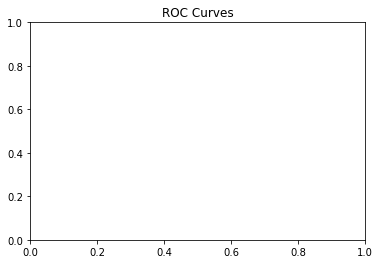

In [49]:
skplt.metrics.plot_roc(y_test, y_predict)
plt.show()

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict, pos_label=2)
auc(fpr, tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


nan